In [3]:
import pandas as pd
import numpy as np
df = pd.read_csv("news_raw.csv", encoding="utf-8")
titles = df["title"].values
titles.tolist()

['金融時報：台灣債蛙 5 月平均血虧 11-12%！美債ETF市場風氣太單一',
 '什麼是 ICM 敘事：推文即代幣，Believe 讓風投更民主嗎？',
 '巴菲特最後一課？今晚波克夏股東大會看這3點：接班人、3,342億鎂現金佈局與全球經濟展望',
 '非農就業太強！Fed傳聲筒：6月降息機會大減，高盛、巴克萊改口「要等7月」',
 '區塊鏈如何重塑銀行？傳統金融的 10 個變革性應用',
 '美國虧待台日韓盟友？川普：完全不感抱歉、課中國145％關稅是他們活該',
 '黃金再飆新高》歷史統計：比特幣通常將在 100~150 天內跟進拉漲',
 '摩根大通執行長警告：美債「遲早出事」聯準會或重演2020年救市劇本！比特幣將受惠上漲？',
 '渣打銀行與 OKX 推出全球領先的質押資產鏡像項目',
 '聯準會公布3月會議紀要：美國通膨與經濟放緩風險；市場預期今年降息剩兩次',
 '美債血崩跌！殖利率飆近3年新高，美國絕望「股債匯三齊跌」',
 '川普「根本算錯」對等關稅！AEI學者爆：稅率灌水4倍，關鍵參數沒搞懂',
 '聯準會鮑爾喊「不急降息」，美國經濟還很強；川普回應：動作太慢了',
 '9GAG創辦人收購香港上市公司，計畫更名為MemeStrategy（迷策略）',
 '川普：不想馬斯克離開白宮重返特斯拉，會盡力挽留',
 '聯電傳與格羅方德合併，股價噴漲！台灣半導體二哥也被美國包牌？',
 '礦企MARA要發20億美元股票「籌資買更多比特幣」，股價為何不漲反跌?',
 '黃金再破歷史新高3100鎂！市場避險需求不停，金價預期持續攀升',
 '高盛：對沖基金本周瘋狂拋售全球科技股！規模創5年次高、僅次去年8月股災',
 '美股驚現「黑色星期五」加密概念股成重災區、MicroStrategy暴跌10%；比特幣恐下探7.2萬鎂？',
 '美國2月PCE 「通膨升溫」Fed降息恐再等，美股全面收黑、比特幣險守8.4萬',
 'GameStop學微策略買比特幣！將發13億鎂可轉債，股價嚇跌22%',
 '黃金突破3070美元歷史新高！高盛看好再漲10%：有兩大進場好時機',
 '全球首支代幣化貨幣市場ETF面世：HashKey Group與博時基金聯手推動傳統金融與區塊鏈融合',
 '川普對非美製造汽車加徵25％關稅！美股重挫，但比特幣意外堅挺',
 '華爾街熱

In [ ]:
import jieba
import jieba.analyse
from collections import Counter

all_keywords = []

for title in titles:
    keywords = jieba.analyse.extract_tags(title, topK=20, withWeight=False) # tf-idf
    all_keywords.extend(keywords)  # 累計所有關鍵字


keyword_freq = Counter(all_keywords)

#取出出現頻率最高的前 20 個詞
top_keywords = keyword_freq.most_common(20)


print("出現頻率最高的前 20 個關鍵詞：")
for word, freq in top_keywords:
    print(f"{word}: {freq}")

Building prefix dict from the default dictionary ...
Dumping model to file cache C:\Users\Kevin\AppData\Local\Temp\jieba.cache
Loading model cost 0.570 seconds.
Prefix dict has been built successfully.


出現頻率最高的前 20 個關鍵詞：
比特: 35
川普: 20
降息: 19
美元: 18
聯準: 17
美股: 17
美國: 16
新高: 14
關稅: 12
利率: 11
市場: 10
經濟: 10
策略: 10
ETF: 9
Fed: 8
如何: 8
金融: 7
警告: 7
特斯拉: 7
貨幣: 7


In [6]:
from collections import defaultdict
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [19]:
# 分類詞典：{分類: 所有關鍵字串接}
category_keywords = defaultdict(str)

# 處理每筆資料
for row in df.iterrows():
    text = row[1]["title"]
    category = row[1]['labels']
    
    # 使用 jieba.analyse 抽取關鍵詞
    keywords = jieba.analyse.extract_tags(text, topK=20)
    
    # 串接文字（WordCloud 需要長字串）
    category_keywords[category] += ' '.join(keywords) + ' '


In [21]:
plt.rcParams['font.sans-serif'] = ['Microsoft JhengHei'] # 修改中文字體
plt.rcParams['axes.unicode_minus'] = False # 顯示負號

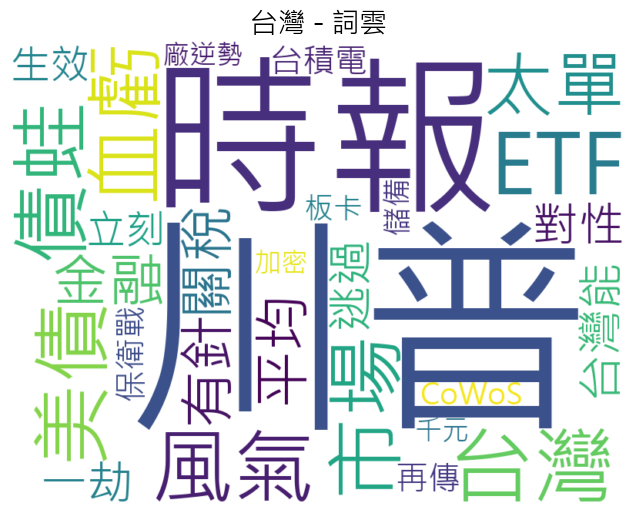

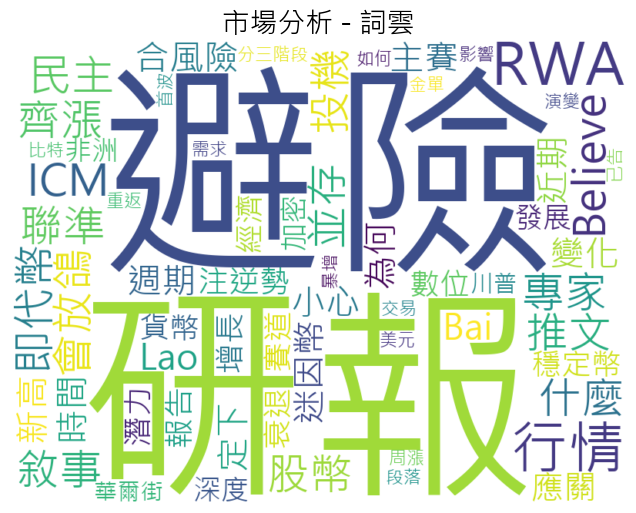

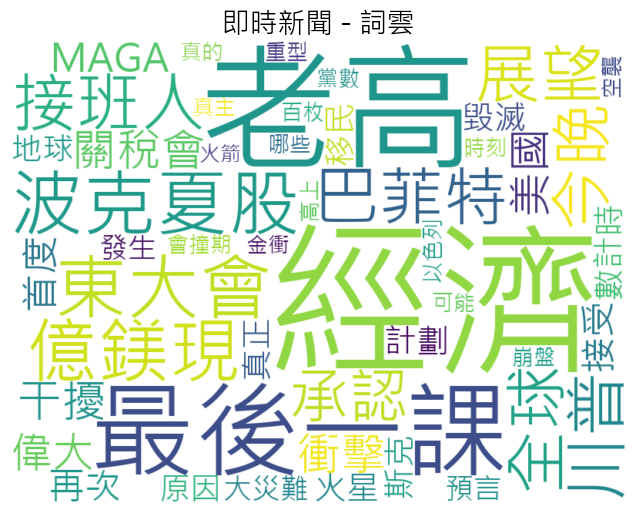

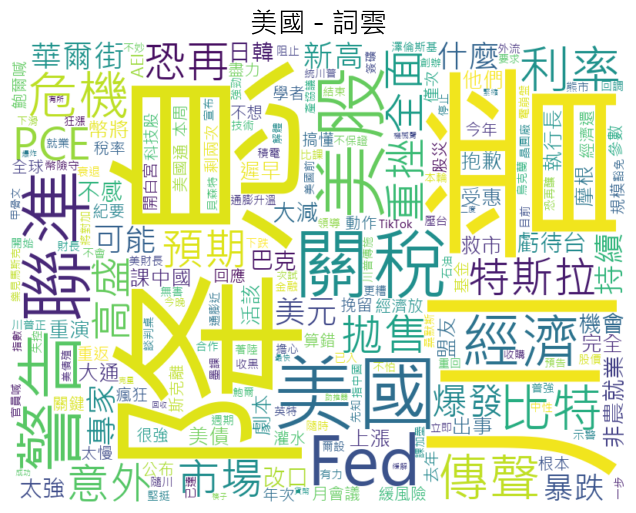

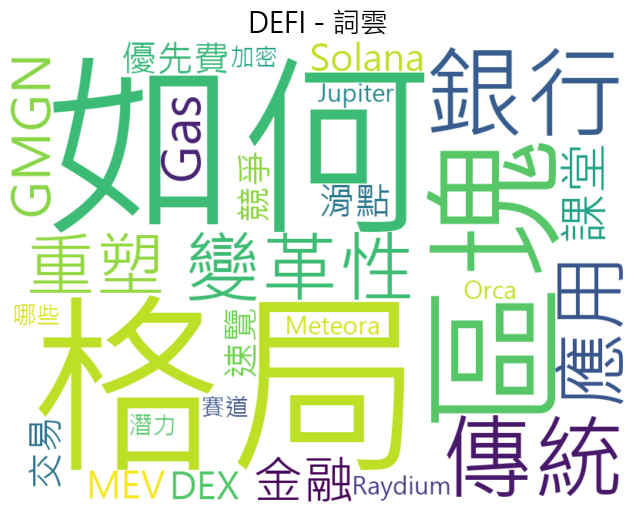

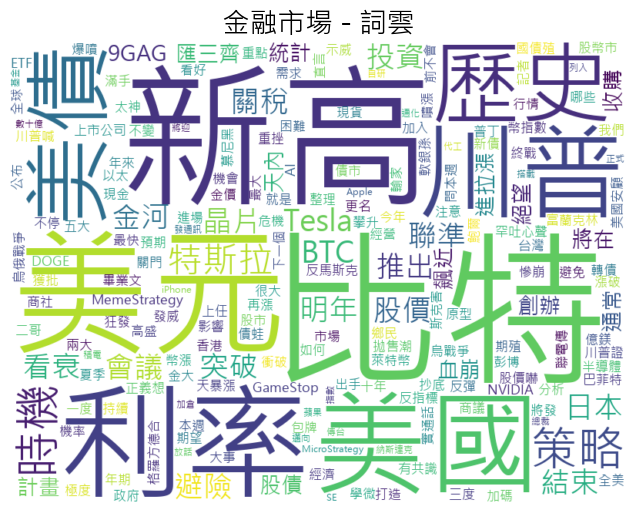

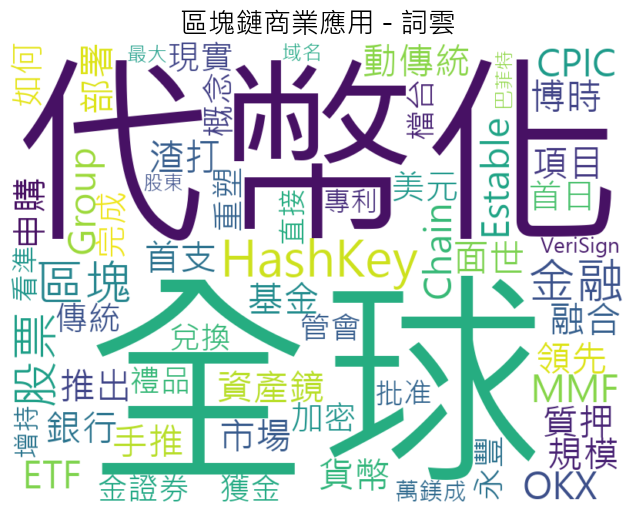

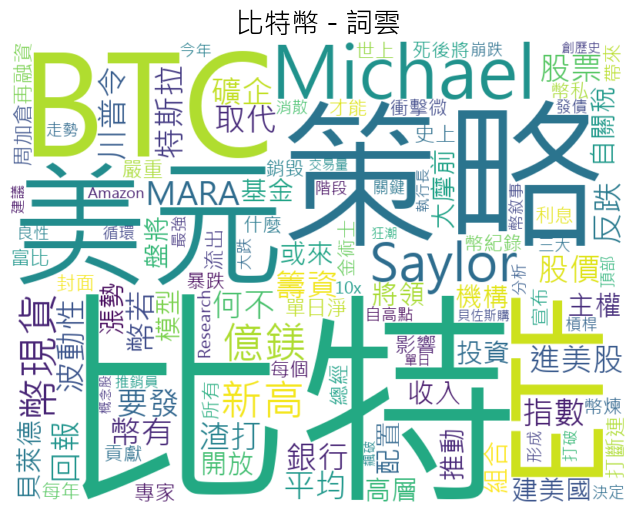

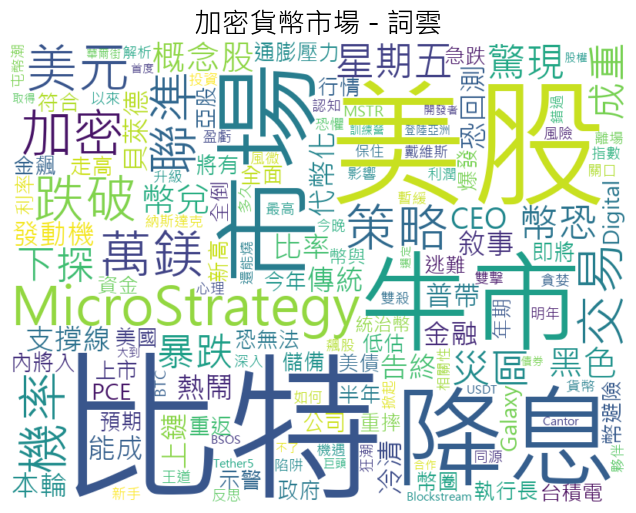

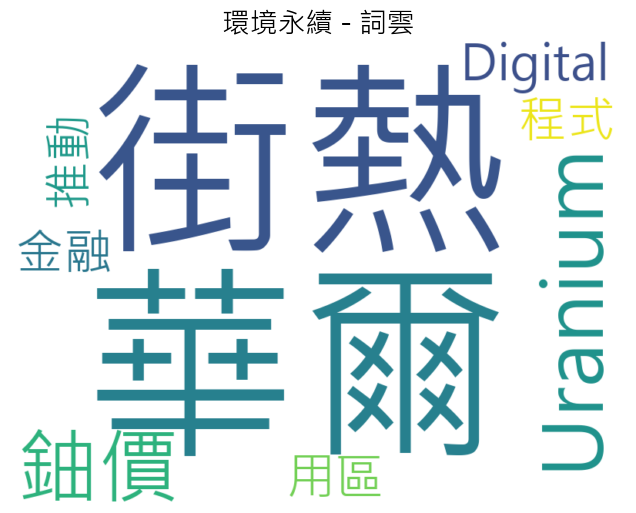

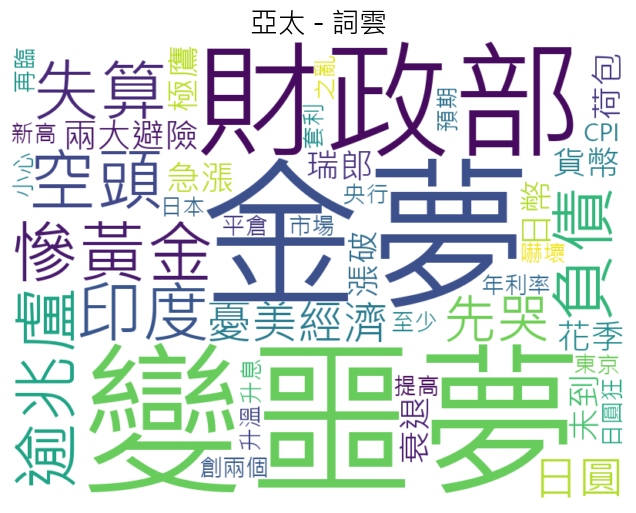

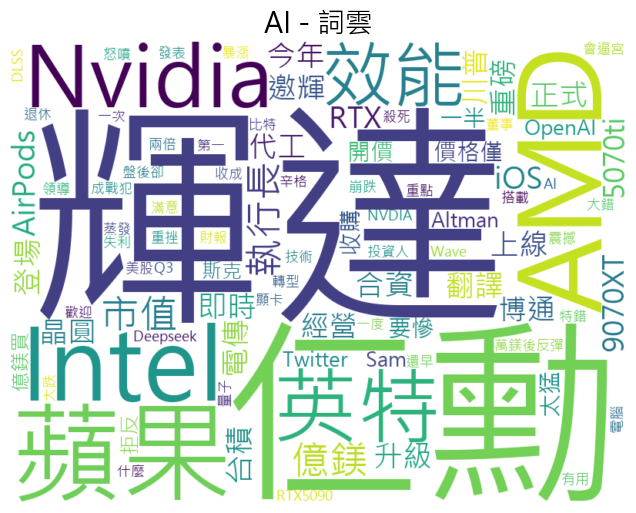

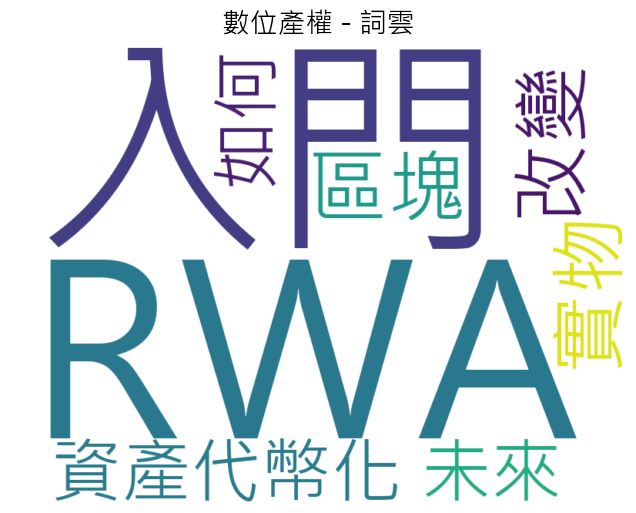

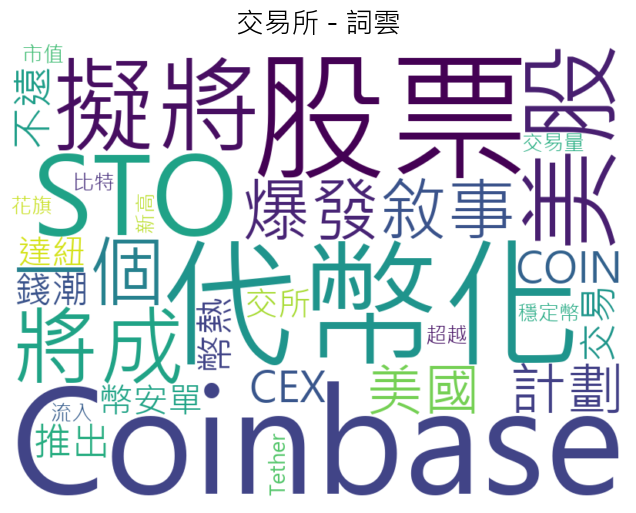

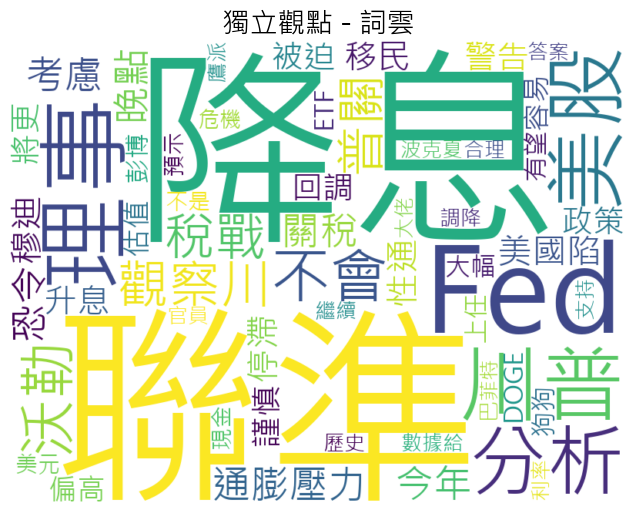

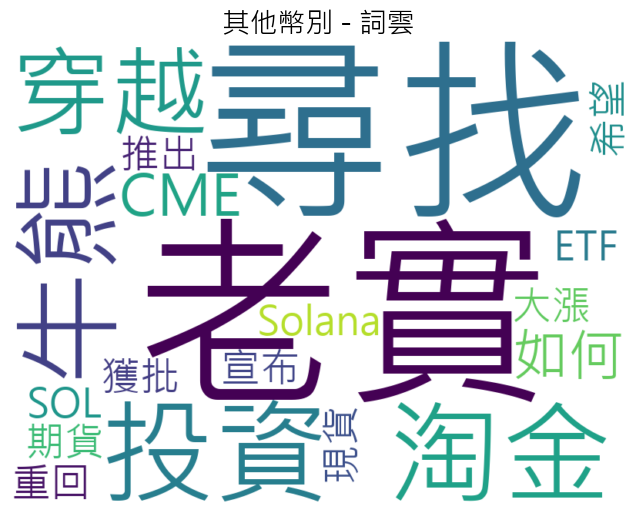

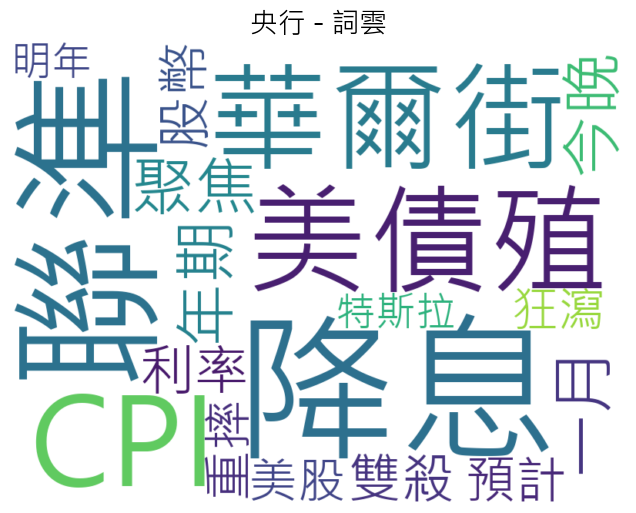

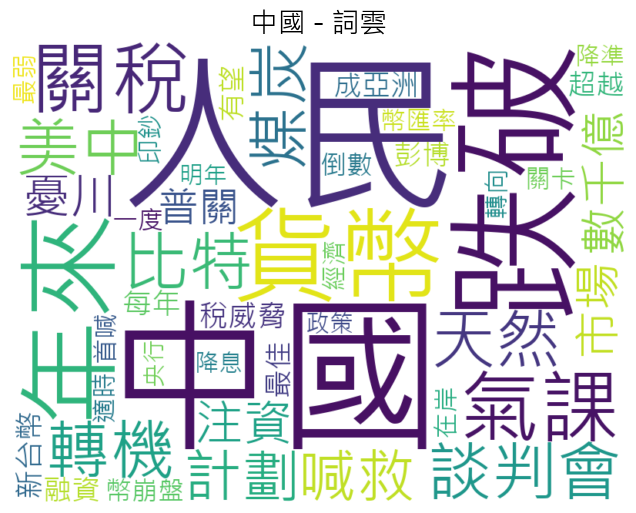

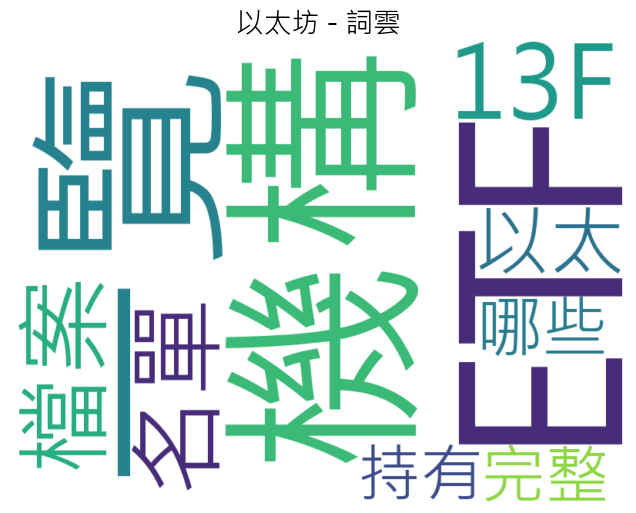

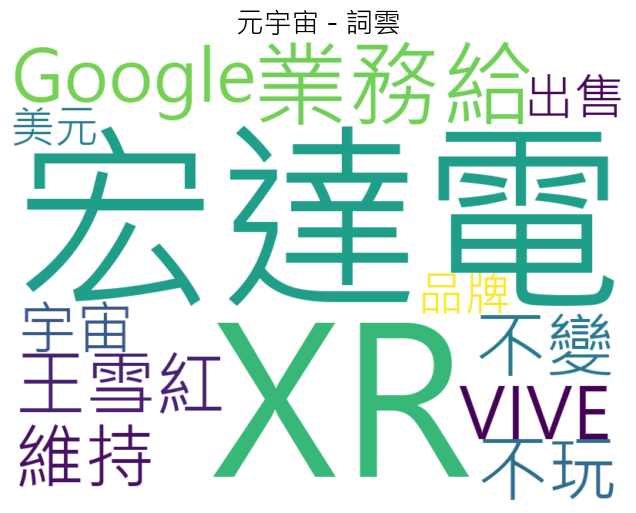

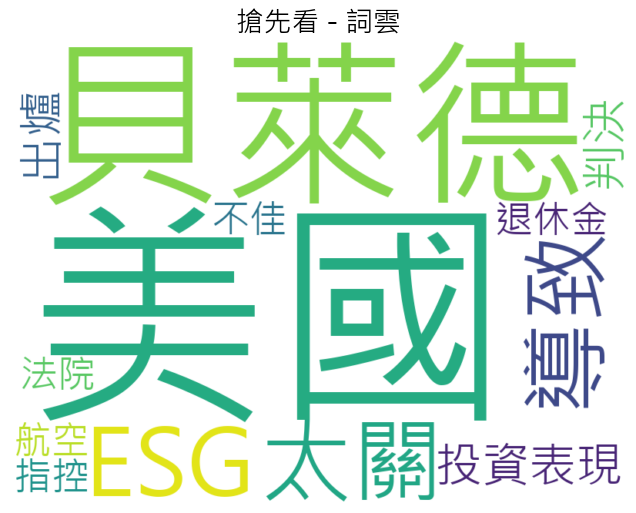

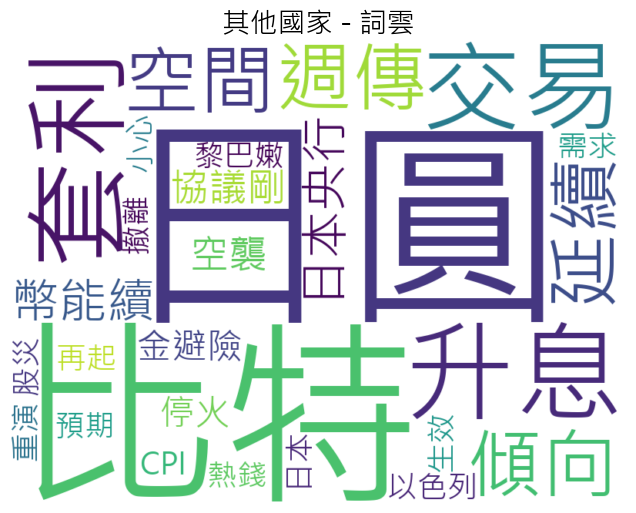

In [22]:
font_path = 'msjh.ttc'
# 繪製詞雲
for category, text in category_keywords.items():
    wordcloud = WordCloud(font_path=font_path,
                          width=800,
                          height=600,
                          background_color='white').generate(text)
    
    # 顯示詞雲
    plt.figure(figsize=(8, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title(f"{category} - 詞雲", fontsize=20)
    plt.show()